# Situation
A company in India wishes to have a better grasp upon their expenditure and in particular, travel expenditure. Their interactions with data science is limited and have asked for a report to:
* whether they are overpaying for their flight tickets
* understand how they spend their money
* a system going forward to enable them to understand whether a ticket is appropriately priced.


They have provided a dataset of past tickets the have considered for their staff as part of their request. 

# Overview 
The data provided by the company consists of over 3000 domestic flights in India.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv", index_col = "Unnamed: 0")

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


They consist of the following variables.

* Airline - Categorical, Nominal 
* Flight - Categorical, Nominal 
* Source city - Categorical, Nominal 
* Departure time - Ordinal 
* Stops - Discrete 
* Arrival time - Ordinal 
* Destination city - Categorical, Nominal 
* Class - Ordinal 
* Duration - Interval 
* Days left - Interval 

Based upon the client’s request, the report will explore each of the key factors that determine the purchase of a flight for the company and whether they had overpaid/underpaid for a ticket. 
In the next step, a model will be created to enable the supplier to estimate the cost of a flight. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [3]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# Assessing factors
The prices of the tickets is approx. 1105 to 123071. There some flights above 100,000 where the values are mathematical outliers. In other words, there is a likelihood that the client may have overpaid for these flights. This should be noted as further analysis may also be swayed by such figures. 

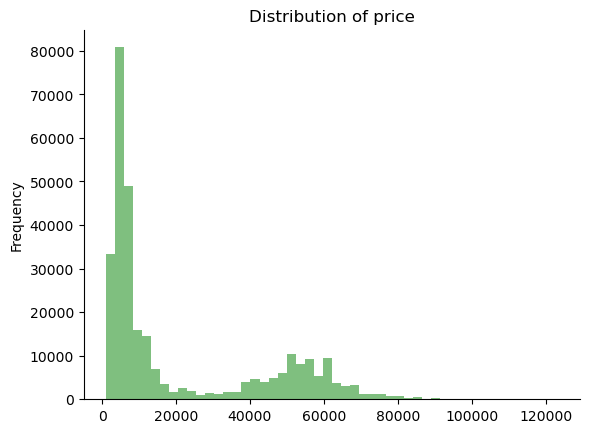

In [4]:
df["price"].plot(kind = "hist", bins =50, color = "green", alpha =.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of price")
plt.show()

The data is centred around some specific and peak at around 15,000 and 50,000. Investigation relevels that a contributing factor to this is due to the flight class. 

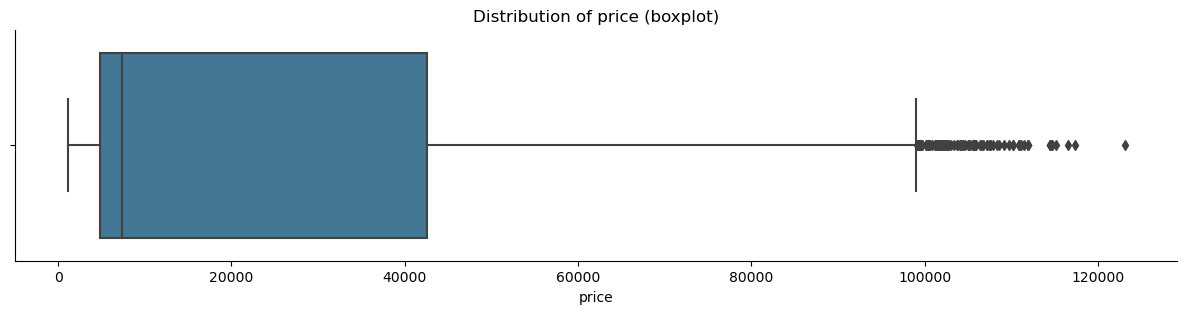

In [5]:
plt.figure(figsize = (15,3))
sns.boxplot(data = df, x = "price", palette = "mako")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of price (boxplot)")
plt.show()

## Class 
This suspicion is confirmed by the following graph. For reference, the data is skewed in favour of economy flights as the data consists of over 69% of such flights.

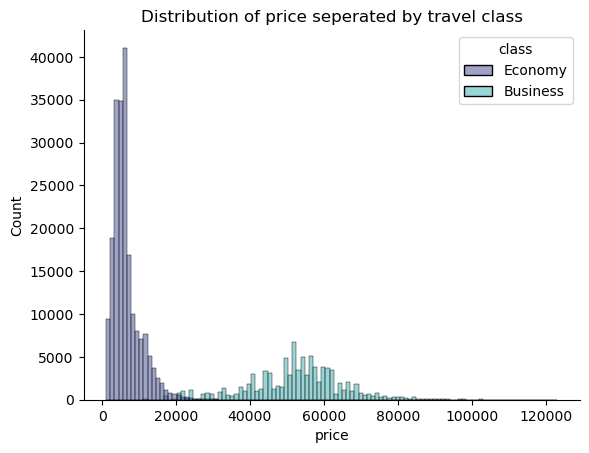

In [6]:
sns.histplot(x = "price", hue = "class", data = df, color = ["green", "blue"], alpha =.5, palette = "mako")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of price seperated by travel class")
plt.show()

In [7]:
pcent = round((df[df["class"]=="Economy"].shape[0]/df.shape[0])*100,2)

print(f"{pcent}% of entries are classed as Economy flights.")

68.85% of entries are classed as Economy flights.


In [8]:
x = df[['airline', 'source_city', "flight",'departure_time', 'stops','arrival_time', "class", 'destination_city', 'duration', 'days_left']]
y = df['price']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.3, random_state = 360)

## Airline 
This dataset includes information for 6 different airlines. Their distribution is uneven with Vistara dominating the data whilst Spicejet's information is limited. 


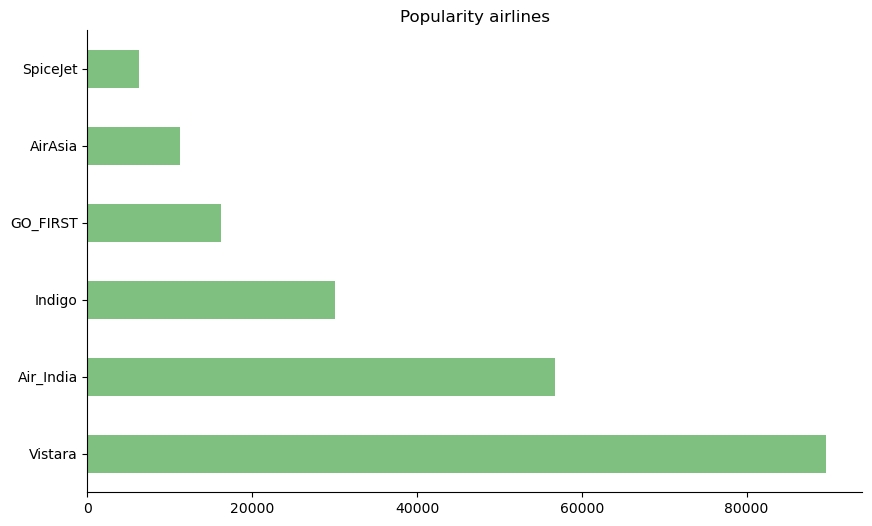

In [9]:
plt.figure(figsize = (10,6))
x_train["airline"].value_counts().plot(kind = "barh", color = "green", alpha =.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Popularity airlines")
plt.show()

In terms of its impact on price, Vistara , not only has a large number of entries but also has a large distribution in the price. Spicejet's, in contrast, has a limited number of data but also its price ranges are concentrated. 

<Figure size 1000x600 with 0 Axes>

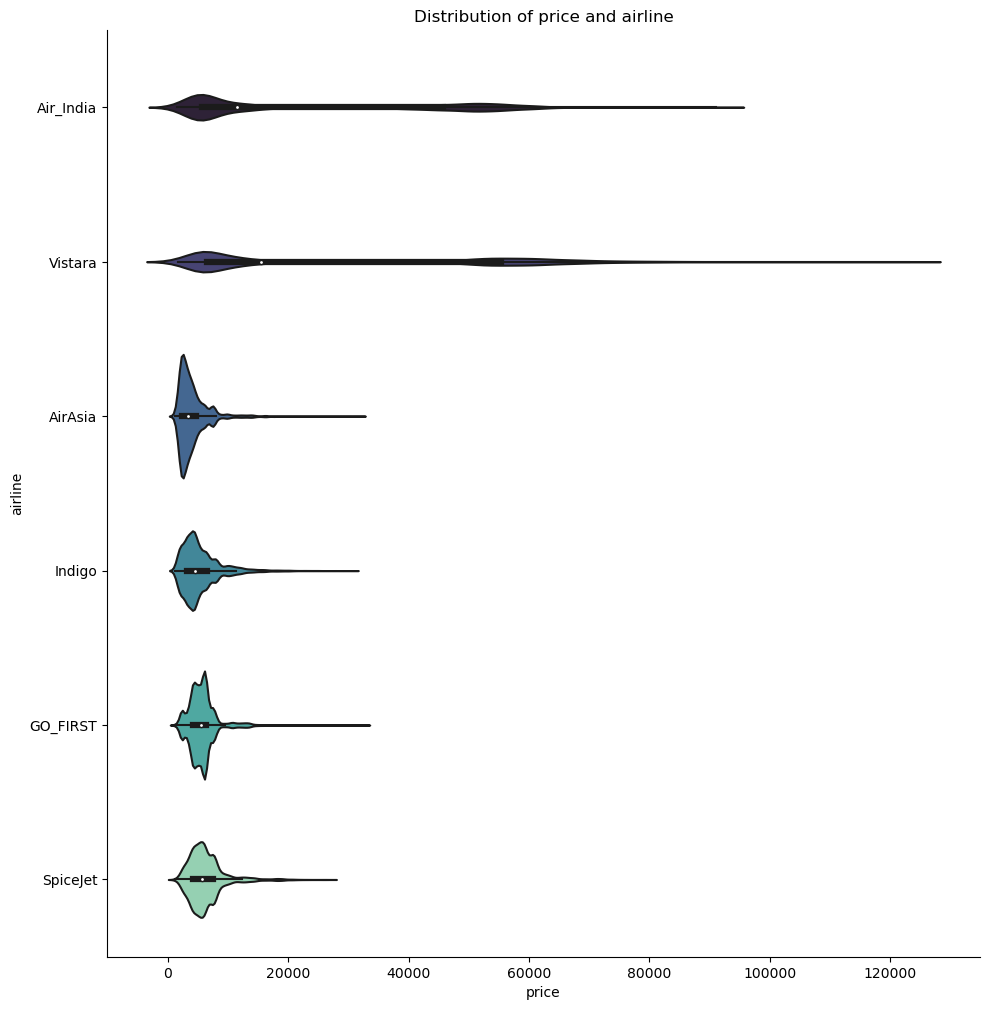

In [10]:
train = x_train.join(y_train).copy()
test = x_test.join(y_test).copy()

plt.figure(figsize = (10,6))
sns.catplot(data = train, x = "price", y = "airline", kind =  "violin", height = 10, palette = "mako")
plt.title("Distribution of price and airline")

plt.show()

## Flight
There are over 1500 different flights listed in this dataset. Flight  UK-706 appears over 3000 times whilst  G8-107 has only one data. As flights numbers can be repeated, the frequency variation is likely due to be related to the frequency in which the company sought specific routs and times. 

In [11]:
flighs = train["flight"].nunique()

print(f"No of fight numbers - {flighs}")

No of fight numbers - 1552


In [12]:
print("Popular flights" )
train["flight"].value_counts()

Popular flights


UK-706     2289
UK-772     1894
UK-720     1854
UK-828     1721
UK-822     1717
           ... 
AI-437        1
SG-9974       1
SG-9923       1
G8-962        1
SG-8339       1
Name: flight, Length: 1552, dtype: int64

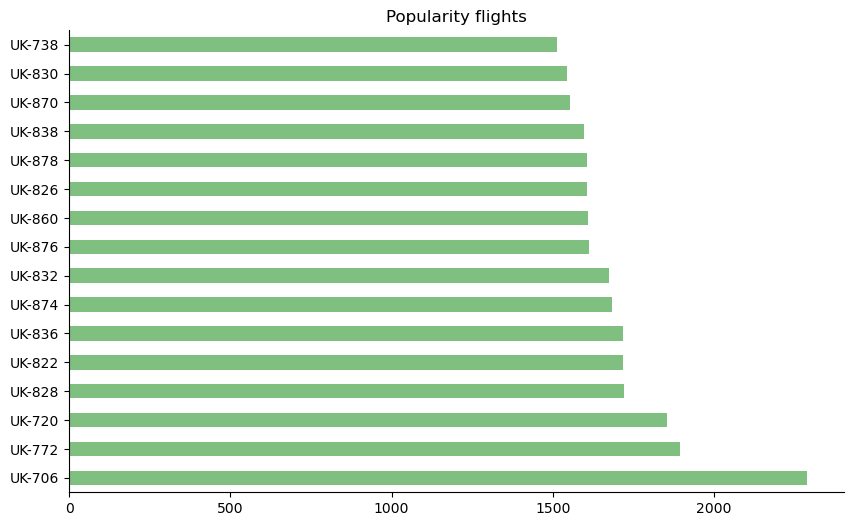

In [13]:
flights = train["flight"].value_counts().loc[lambda x: x>1500].reset_index()['index']

flights_data = train[train["flight"].isin(flights)]

plt.figure(figsize = (10,6))
flights_data["flight"].value_counts().plot(kind = "barh", color= "green", alpha=.5)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.title("Popularity flights")
plt.show()

In [14]:
train.drop("flight", inplace = True, axis = 1)
x_train.drop("flight", inplace = True, axis = 1)

test.drop("flight", inplace = True, axis = 1)
x_test.drop("flight", inplace = True, axis = 1)


## Source and destination city
All flights travel to and from a set location in India. This includes Delhi, Mumbai, Bangalore, Kolkata, Hyderabad and Chennai. Bangalore and Chennai appears to have the biggest price ranges although it is not the most common value in the dataset.  

In [15]:
names = df["source_city"].unique()
print("Source Destinations -",', '.join(names))

Source Destinations - Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai


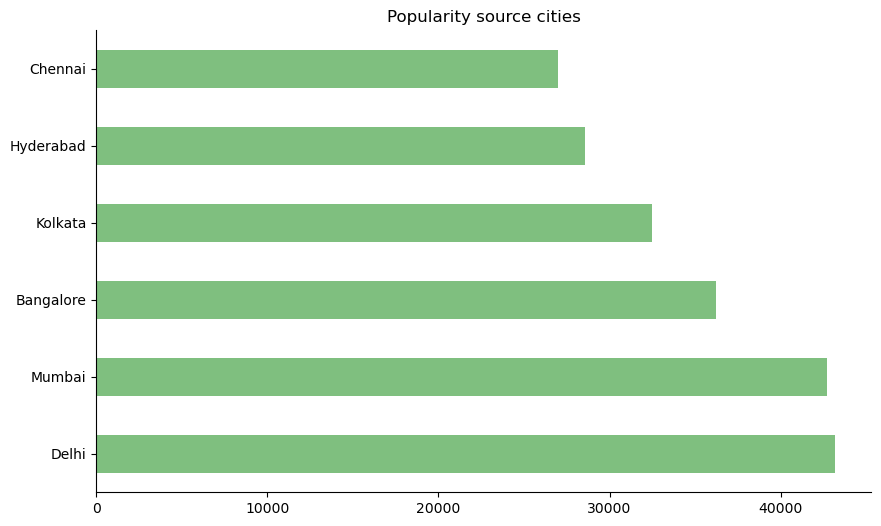

In [16]:
plt.figure(figsize = (10,6))
train["source_city"].value_counts().plot(kind ="barh", color = "green", alpha=.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Popularity source cities")

plt.show()

<Figure size 1000x600 with 0 Axes>

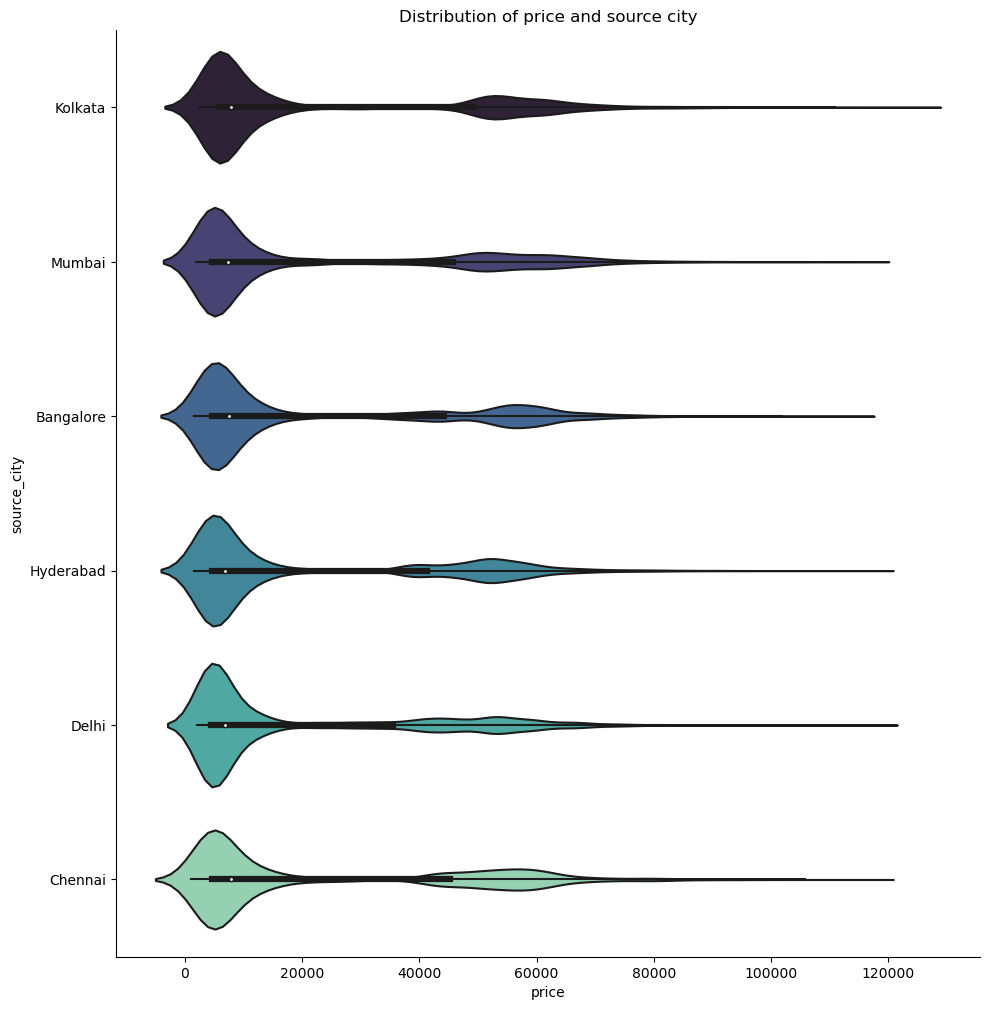

In [17]:
plt.figure(figsize = (10,6))
sns.catplot(data = train, x = "price", y = "source_city", kind =  "violin", height = 10, palette = "mako")
plt.title("Distribution of price and source city")

plt.show()

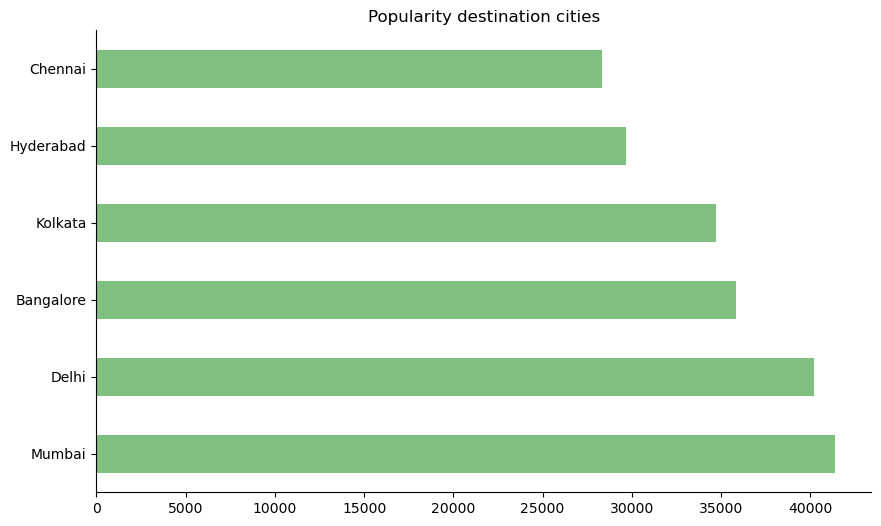

In [18]:
plt.figure(figsize = (10,6))
train["destination_city"].value_counts().plot(kind ="barh", color = "green", alpha =.5)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.title("Popularity destination cities")

plt.show()

<Figure size 1000x600 with 0 Axes>

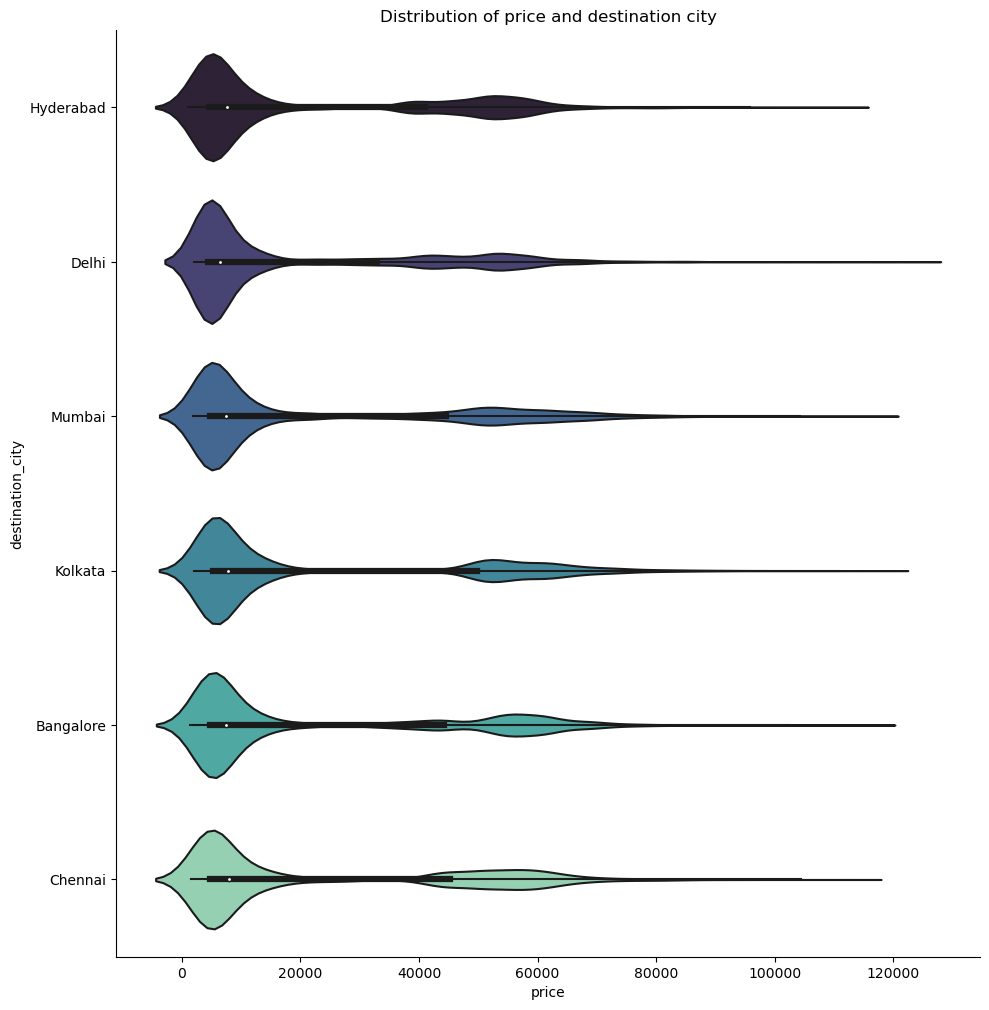

In [19]:
plt.figure(figsize = (10,6))
sns.catplot(data = train, x = "price", y = "destination_city", kind =  "violin", height = 10, palette = "mako")
plt.title("Distribution of price and destination city")

plt.show()

## Stops 
As far as this dataset is concerned, there are three types of flights. Direct (or zero stop) flights, one stop or those which have more than two. Depending on the type of flight, the costs can vary drastically. Direct flights are more affordable whilst those with one stop has a larger distribution of prices. 

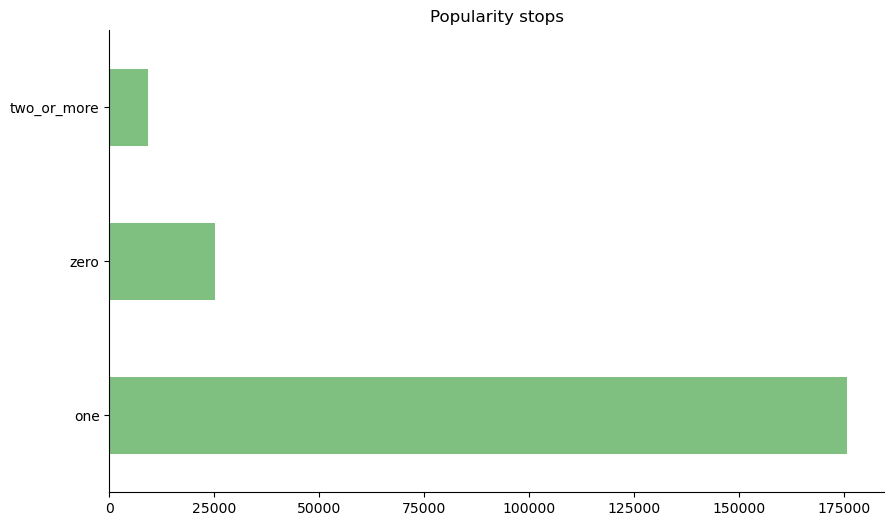

In [20]:
plt.figure(figsize = (10,6))
train["stops"].value_counts().plot(kind ="barh", color = "green", alpha =.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Popularity stops")

plt.show()

<Figure size 1000x600 with 0 Axes>

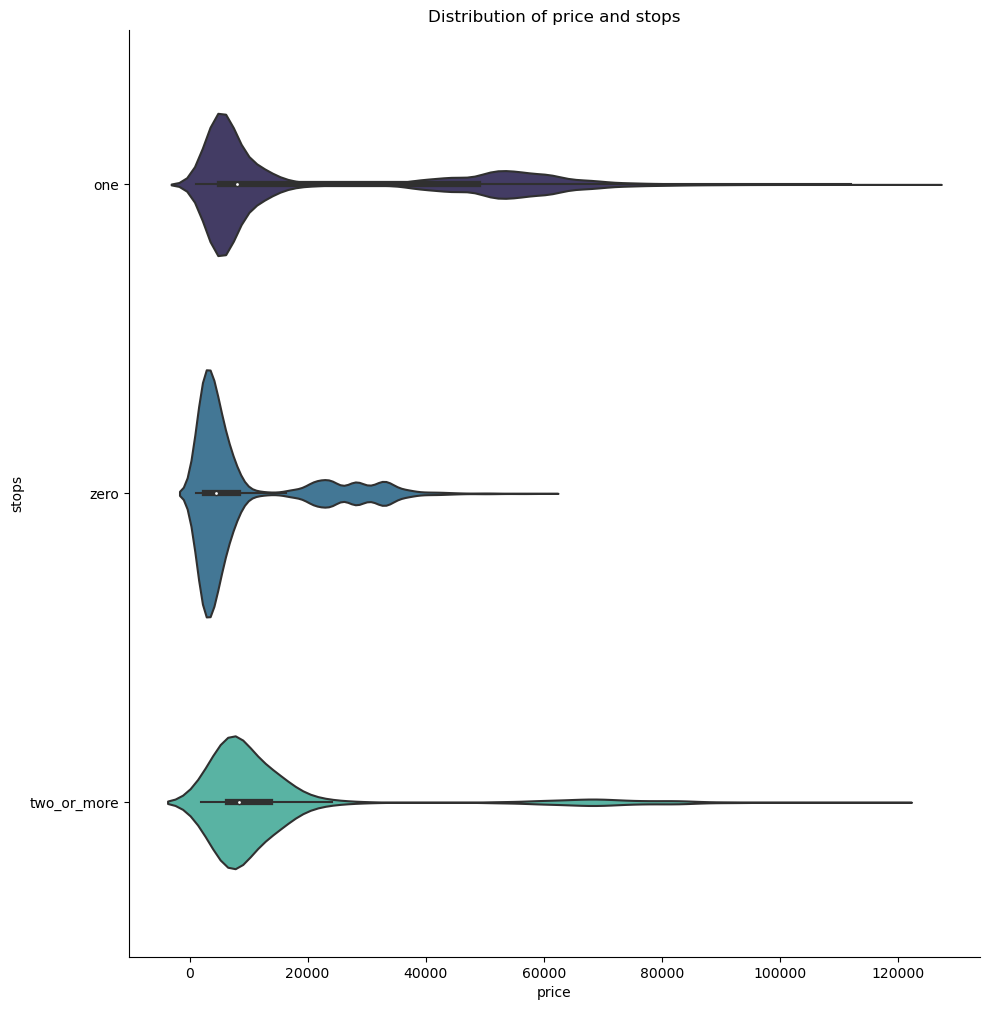

In [21]:
plt.figure(figsize = (10,6))
sns.catplot(data = train, x = "price", y = "stops", kind =  "violin", height = 10, palette = "mako")
plt.title("Distribution of price and stops")

plt.show()

## Departure & arrival times
The departure and arrival times have been group into specific times. This grouping does reduce some information that can be gained from the data. That said, the nature of the field remains intact and thus ordinal. Whilst the volume of flights at specific times appear to vary, the prices of the flights appear to be relatively similarly distributed between each time set. However, due to the reduced variance for late night flights, they may be a safer choice if client wishes to avoid overpaying for tickets. 

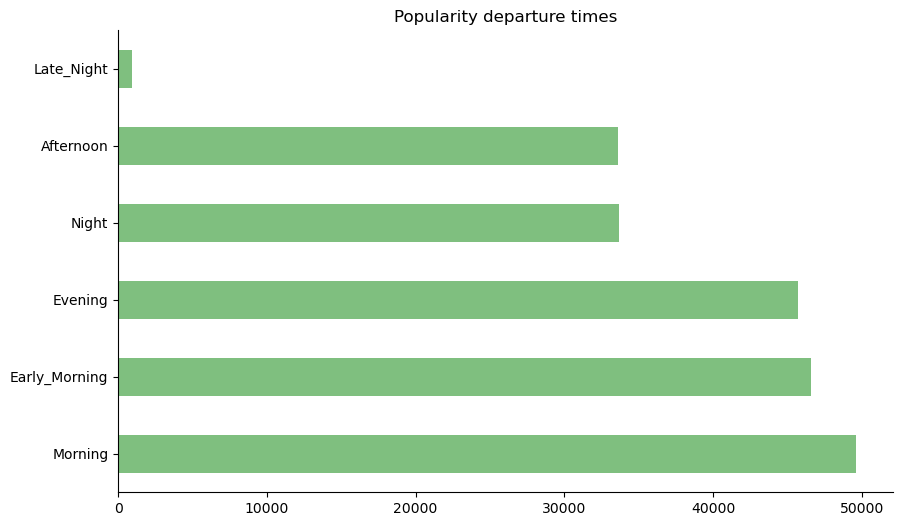

In [22]:
plt.figure(figsize = (10,6))
train["departure_time"].value_counts().plot(kind = "barh", color = "green", alpha =.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Popularity departure times")

plt.show()

<Figure size 1000x600 with 0 Axes>

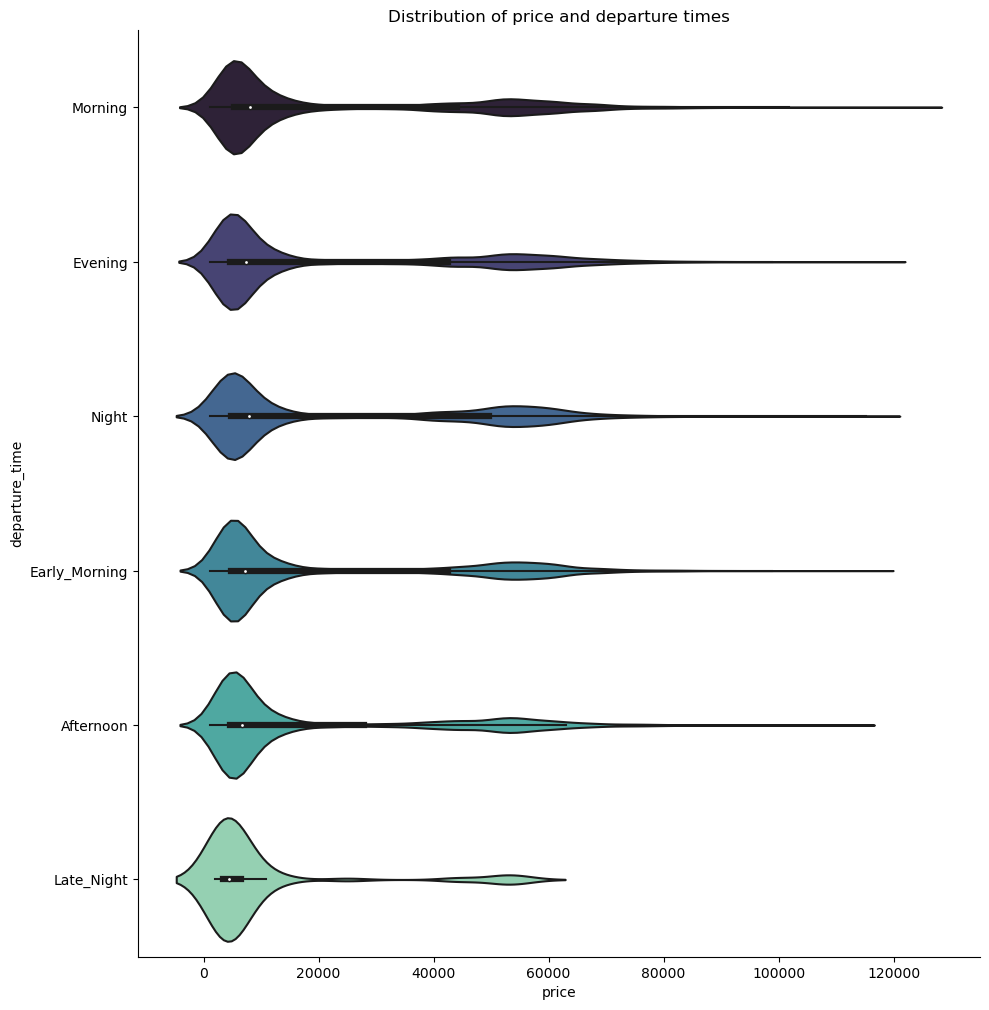

In [23]:
plt.figure(figsize = (10,6))
sns.catplot(data = train, x = "price", y = "departure_time", kind =  "violin", height = 10, palette = "mako")
plt.title("Distribution of price and departure times")

plt.show()

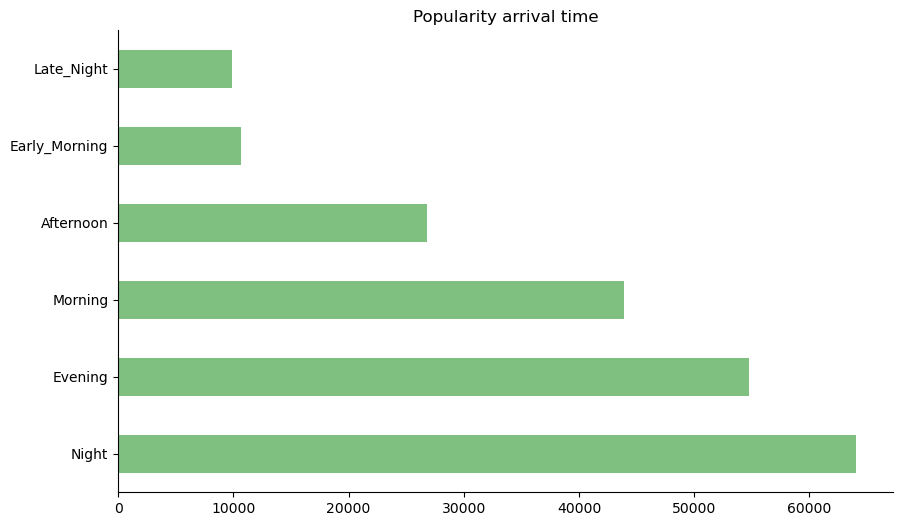

In [24]:
plt.figure(figsize = (10,6))
train["arrival_time"].value_counts().plot(kind = "barh", color = "green", alpha=.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Popularity arrival time")

plt.show()

<Figure size 1000x600 with 0 Axes>

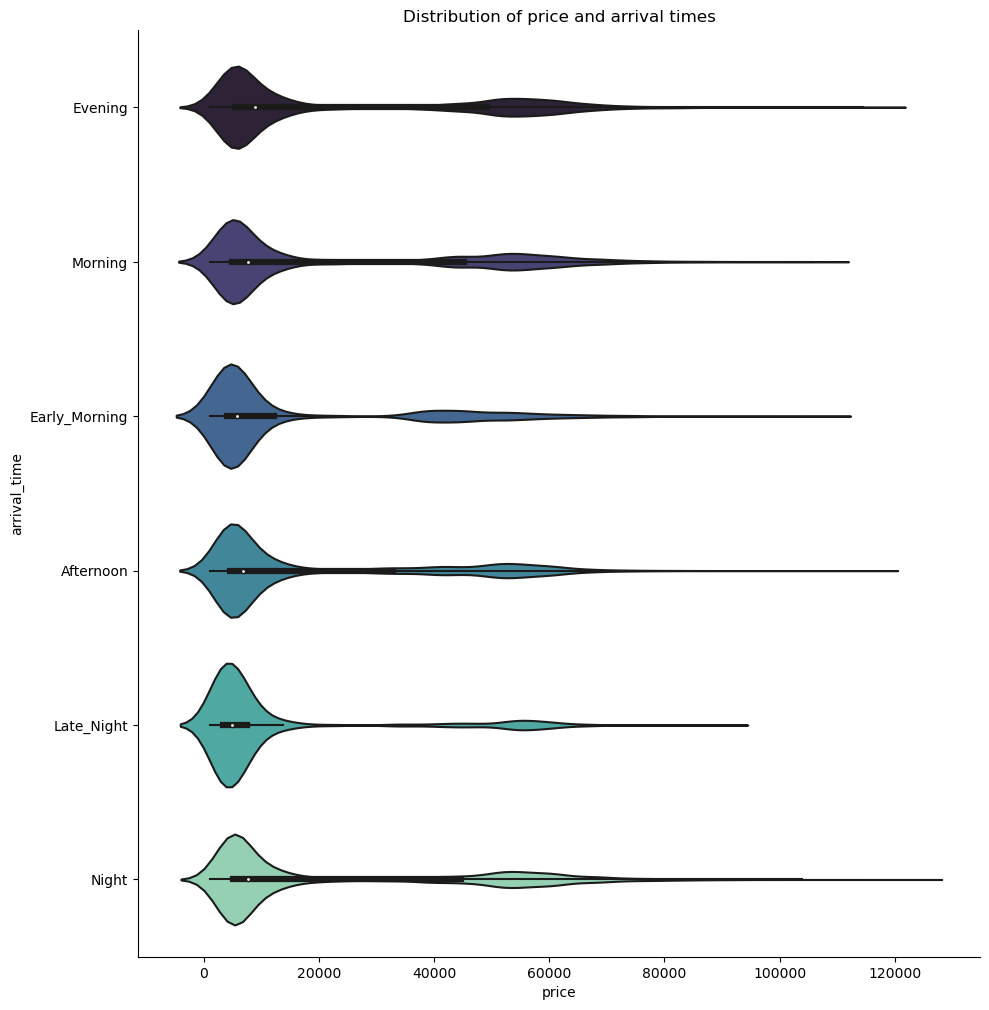

In [25]:
plt.figure(figsize = (10,6))
sns.catplot(data = train, x = "price", y = "arrival_time", kind =  "violin", height = 10, palette = "mako")
plt.title("Distribution of price and arrival times")
plt.show()

## Duration 
Durations are distributed with a positive skew, favouring shorter flights. This is logical as long distance travel is rare compared to short haul flights. 

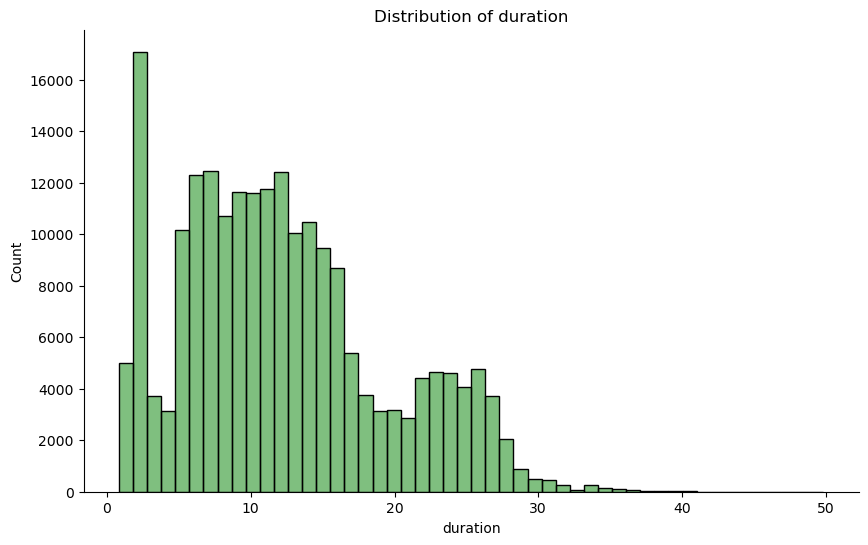

In [26]:
plt.figure(figsize = (10,6))
sns.histplot(data = train, x ="duration", bins = 50, color = "green", alpha =.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of duration")

plt.show()

Its correlation to price is around 0.2 and therefore limited. 

In [27]:
# corrolation table
train[["duration", "price"]].corr()

,duration,price
duration,1.000000,0.204881
price,0.204881,1.000000


## Days left 
At the time of purchase, the flight day could be between 1 to 50 days in advance. Its variation between 15 to 45 days remains relatively even. Finally, its correlation with price is relatively weak. In other words, days has a limited impact on pricing. 

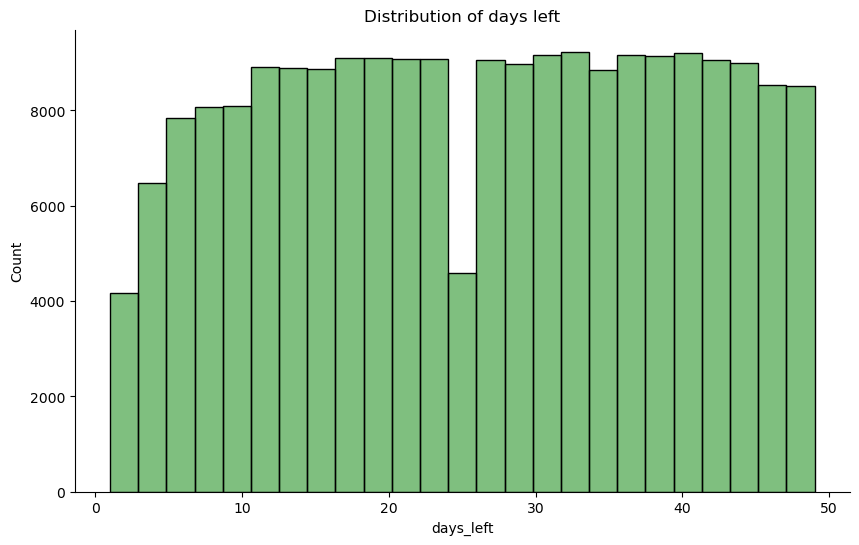

In [28]:
plt.figure(figsize = (10,6))
sns.histplot(data = train, x ="days_left", bins = 25, color = "green", alpha = .5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of days left")

plt.show()

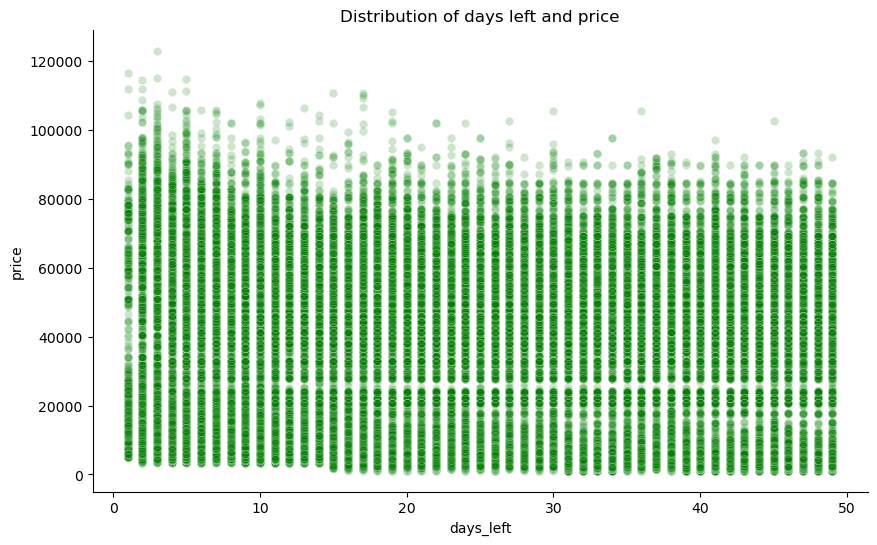

In [29]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = train, x ="days_left", y = "price", color = "green", alpha =.2)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of days left and price")
plt.show()

# Creating a system
The final request by the client is to have a system which would enable them to estimate the cost of a flight. This would act as a gauge of whether the cost is inline with market prices or not. 

In order to achieve this, a data model/ machine learning is ideal. 

Given how the model will be utilised, the cost and other factors, simplicity may be ideal. Consequently, a linear model as follows could be utilised. As variables such as days left and duration that have a limited impact on price could be excluded from the model, also for this reason of simplicity.

In [30]:
# import libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# drop weak variables 
x_train.drop(["days_left","duration"], axis =1, inplace =True)
x_test.drop(["days_left","duration"], axis =1, inplace =True)

# create function to transform variables
ord_mapping =[["Early_Morning","Morning","Afternoon", "Evening","Night","Late_Night" ],
              ["Early_Morning","Morning","Afternoon", "Evening","Night","Late_Night" ], 
              ["zero","one","two_or_more" ]]

t= ColumnTransformer(transformers=[
    ("onehot", OneHotEncoder(),["airline", "source_city", "destination_city", "class"]),
    ('ordinal', OrdinalEncoder(categories=ord_mapping), ["departure_time", "arrival_time", "stops"])])


# transform variables 
Train_features  = t.fit_transform(x_train)
test_features = t.fit_transform(x_test)

# create model 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(Train_features, y_train)


#predict values
predictions = lm.predict(test_features)

# complie actual and predicted values into table
results =pd.DataFrame({"ytest":y_test })

results["pred"] = predictions
results["diff"] = results["ytest"]-results["pred"]

results.head()

,ytest,pred,diff
287248,41314,52688.0,-11374.0
211074,53164,49267.0,3897.0
163565,4660,8082.0,-3422.0
141380,6195,11611.0,-5416.0
214839,62729,53099.0,9630.0


In [31]:
from sklearn import metrics

# Root mean squared error score
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))

print(f"RMSE score - {RMSE :0.2f}")

RMSE score - 7066.94


In [32]:
# descriptive data for the target in the test dataset
print("Key markers for target for test data")
test["price"].describe()

Key markers for target for test data


count     90046.000000
mean      20831.770562
std       22658.973396
min        1105.000000
25%        4761.250000
50%        7425.000000
75%       42457.000000
max      117307.000000
Name: price, dtype: float64

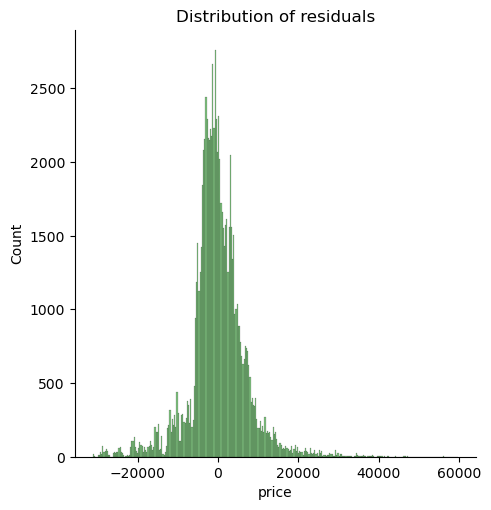

In [33]:
# distribution of residuals 
sns.displot((y_test-predictions), color = "green", alpha =.5)
plt.title("Distribution of residuals")
plt.show()

Such a model would maintain and increase the usability of the model, it would also ensure that the accuracy of the model remained around 90%. 

In [34]:
# run cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val = cross_val_score(LinearRegression(), Train_features,y_train, cv=10)

print('Cross-Validation Accuracy Scores -\n', cross_val, "\n\n")
print('Cross-Validation Accuracy Scores AVG -', cross_val.mean())

Cross-Validation Accuracy Scores -
 [0.9022343  0.90267238 0.90289028 0.90224301 0.90240416 0.90314334
 0.90292824 0.90437001 0.90395973 0.90696769] 


Cross-Validation Accuracy Scores AVG - 0.9033813135996205


In [35]:
# drop outliers via IQR 
Q1 = df["price"].quantile(0.25) 
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

condition = ~((df["price"] < (Q1 - 1.5 * IQR)) | (df["price"] > (Q3 + 1.5 * IQR)))

filtered_df = df[condition]

# reestablish x and y
x = filtered_df[['airline', 'source_city', "flight",'departure_time', 'stops','arrival_time', "class", 'destination_city']]
y = filtered_df['price']

# resplit data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.3, random_state = 360)

# transform data 
Train_features  = t.fit_transform(x_train)
test_features = t.fit_transform(x_test)

# create model 
lm = LinearRegression()

lm.fit(Train_features, y_train)

LinearRegression()

In [36]:
# predict values 
predictions = lm.predict(test_features)

# table  pred and diff 
results =pd.DataFrame({"ytest":y_test })

results["pred"] = predictions
results["diff"] = results["ytest"]-results["pred"]


# Root mean squared error score
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))

print(f"RMSE score - {RMSE :0.2f}")

RMSE score - 6966.14


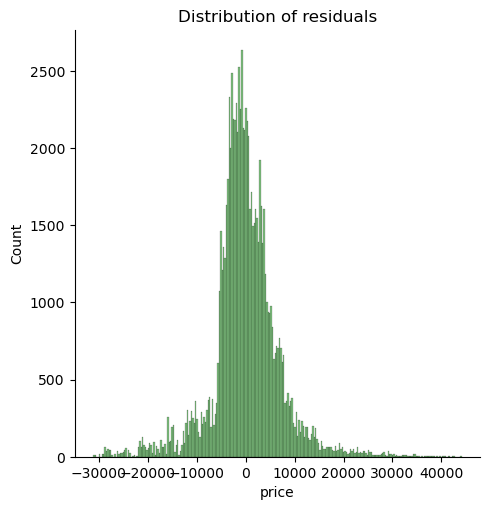

In [37]:

sns.displot((y_test-predictions), color = "green", alpha =.5)
plt.title("Distribution of residuals")

plt.show()

In [38]:
# run cross validation

cross_val = cross_val_score(LinearRegression(), Train_features,y_train, cv=10)

print('Cross-Validation Accuracy Scores -\n', cross_val, "\n\n")
print('Cross-Validation Accuracy Scores AVG -', cross_val.mean())

Cross-Validation Accuracy Scores -
 [0.90345998 0.90269174 0.90432156 0.90265213 0.90296444 0.90481818
 0.905294   0.90414444 0.90687799 0.90561074] 


Cross-Validation Accuracy Scores AVG - 0.9042835184443456


It is not a perfect system but as a company which has not utilised such models previously, this simplistic model may be a good starting point for them. It keeps their initial costs down whilst meeting their needs. If, in the future, they require more comprehensive predictions from such a model, alternatives could be explored. This is particularly the case as given the transformations undertaken such as encoding and scaling, client’s insights into how the model operates is limited. If they are uncomfortable with this, they may find it difficult to accustom to more complex models. 

# Limitations
It should be highlighted that periodically the client will need further assistance to retrain the model and ensure that the model is able toe predict prices inline with changing factors such as inflation. 

# Conclusion 
The data indicates that the client is currently paying an appropriate amount for their flights given various factors such as travel class and destination. A model with 90% accuracy has been created to enable the company to assess whether a flight is viable/ priced appropriately.

They will require additional support going forward to ensure that the model is able to withstand changes such as inflation. If the client wishes to include international flights or more complex models, this may also be an option going forward. 

# Author’s notes
*This is a slight different project style for me. However I like having projects that have a tangible link to wider world and for machine learning, this style seemed the best approach for me. I am also still relatively new to machine learning and many of the aspects covered in this project aim to draw upon the information listed in chapter 2 of Hands-on machine learning. 
It should be highlighted that the situation above is fictional. However I have frequently come across this “fear” of the unknown presented in this project for companies still not engaged in maximising gains from dat. In such cases, they require handholding and staring slowly.*


*It should be highlighted that the data for this project is ["Flight Price Prediction"](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction) hosted on Kaggle* 